In [ ]:
# Plot 100 for acf and pacf to see if there is seasonality involved
# Do timeseries decomposition and find strength of seasonality and strength of trend
# GPAC to see if there is a pattern 
# If you have seasonality then you do seansoanl differencing then do acf and pacf then feed that into the gpac. 
#then you will find order of NA and Np of SARIMA Model

#Recommendation:
    #do timeseries decomposition 
    # find trend seasonality 
    #then do autucorrelation for longer 100 then if you spot seasnoalit you do seasonal differencing then u put 
    #in the d parameter

    # before feeding to gpac you have to make data sattionary and plot rolling mean and rolling variance make sure its 
    #stationary then estimate the autocorrelation then feed autucorrelation into gpac and see if u can see a pattern

    #check lab 6, 7, 8, 9, 10
    
#plot rolling mean and variance of stationarity dataset   
#Plot ACF and pacf of stationart data set
# calculate autucorrolation of stationary data set
#feed it to the GPAC, read the pattern, estimate the coeffecient, develop forecast function then do prediction

In [1]:
import pandas_datareader as web

In [2]:
!pip install pandas_datareader

In [2]:
arima = web.DataReader('AGYS', data_source='yahoo', start='2002-01-01', end ='2021-09-29')
arima

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-01-02,13.500000,12.350000,12.680000,13.480000,320700.0,12.426841
2002-01-03,14.230000,13.370000,13.510000,14.110000,145500.0,13.007618
2002-01-04,14.100000,13.500000,14.000000,13.850000,339600.0,12.767931
2002-01-07,13.920000,13.610000,13.650000,13.920000,84000.0,12.832461
2002-01-08,13.950000,13.480000,13.830000,13.900000,127400.0,12.814025
...,...,...,...,...,...,...
2021-09-23,54.080002,51.770000,52.820000,53.840000,44300.0,53.840000
2021-09-24,53.930000,52.549999,53.189999,52.639999,50100.0,52.639999
2021-09-27,53.720001,52.389999,52.720001,53.360001,44000.0,53.360001


In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
import math
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
import datetime as dt

In [4]:
arima = arima[["Close"]].copy()
arima

,Close
Date,
2002-01-02,13.480000
2002-01-03,14.110000
2002-01-04,13.850000
2002-01-07,13.920000
2002-01-08,13.900000
...,...
2021-09-23,53.840000
2021-09-24,52.639999
2021-09-27,53.360001


# Stock Price Visualization:

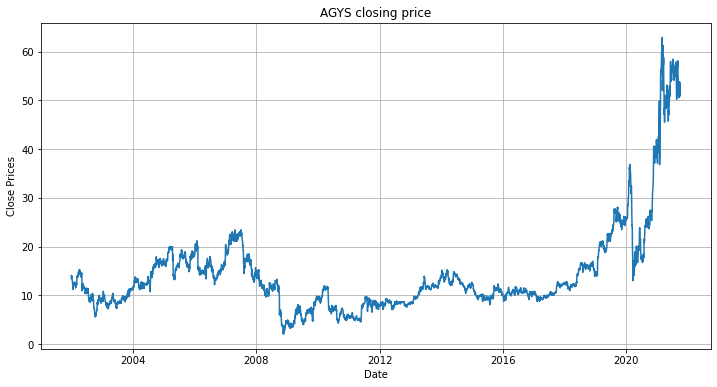

In [5]:
#plot close price
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(arima)
plt.title('AGYS closing price')
plt.show()

# Dataset Probability Distribution:

<AxesSubplot:ylabel='Density'>

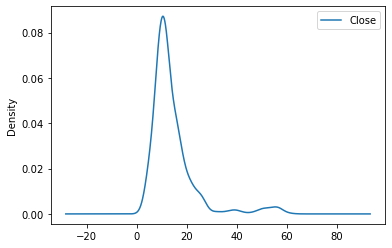

In [6]:
#Distribution of the dataset
AGYS = arima
AGYS.plot(kind='kde')

In [ ]:
# A time series is also regarded to include three systematic components: 
#level, trend, and seasonality, as well as one non-systematic component termed noise.

#1) The average value in the series is called the level.
#2)The increasing or falling value in the series is referred to as the trend.
#3)Seasonality is the series’ recurring short-term cycle.
#4)The random variance in the series is referred to as noise.

# Autocorrelation & Partial Autocorrelation

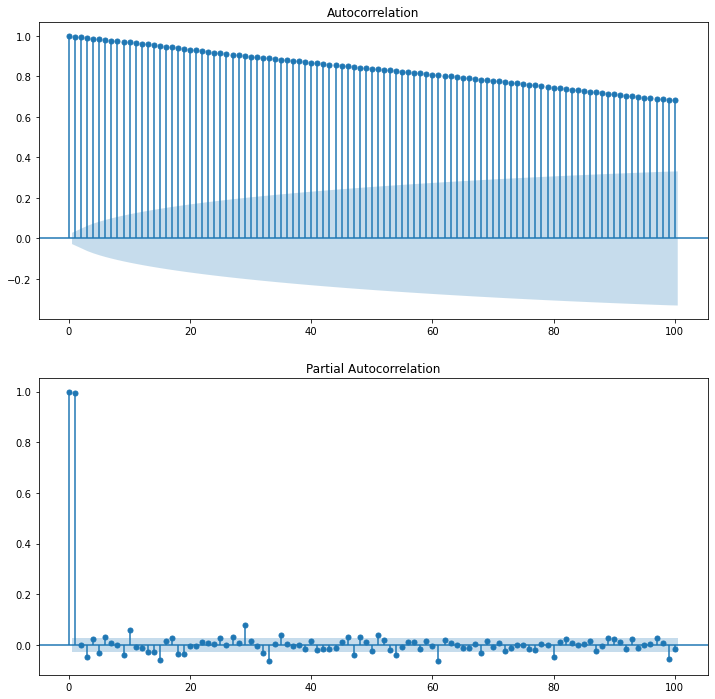

In [6]:
lags = 100

plt.figure(figsize=(12,12))
plt.subplot(211)
plot_acf(arima, ax=plt.gca(), lags = lags)

plt.subplot(212)
plot_pacf(arima, ax=plt.gca(), lags = lags)
plt.show()


# Rolling Statistics Test for staionarity:

In [8]:
Rolling = arima.reset_index()
for i in range(0, arima.shape[0]):
    n = i+1
    mean = sum(arima.head(n)['Close']/n)
    num = (arima['Close'][i] - mean)**2
    arima.loc[arima.index[i], 'Rolling Mean'] = mean
    arima.loc[arima.index[i], 'Rolling Variance'] = num/(n-1)

In [9]:
Rolling

,Date,Close,Rolling Mean,Rolling Variance
0,2002-01-02,13.480000,13.480000,NaN
1,2002-01-03,14.110000,13.795000,0.099225
2,2002-01-04,13.850000,13.813333,0.000672
3,2002-01-07,13.920000,13.840000,0.002133
4,2002-01-08,13.900000,13.852000,0.000576
...,...,...,...,...
4966,2021-09-23,53.840000,14.240052,0.315778
4967,2021-09-24,52.639999,14.247782,0.296751
4968,2021-09-27,53.360001,14.255653,0.307800
4969,2021-09-28,50.910000,14.263028,0.270276


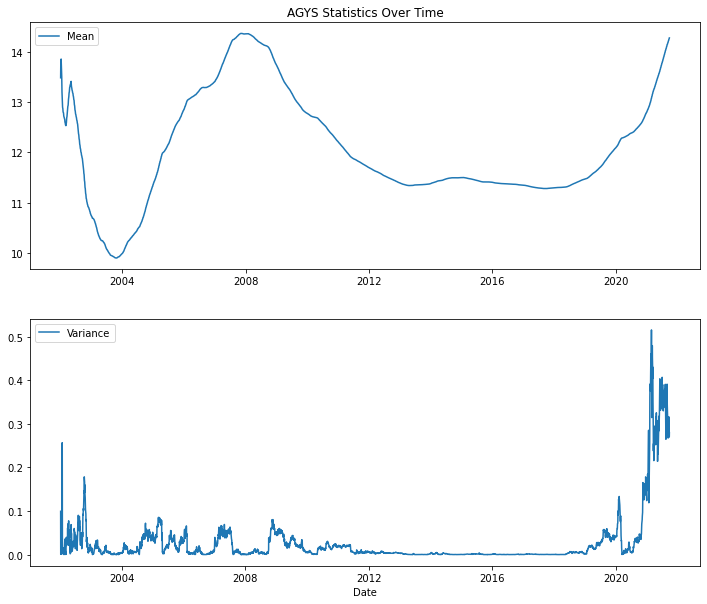

In [10]:
plt.figure(figsize = (12,10))
plt.subplot(211)
plt.title('AGYS Statistics Over Time')
plt.plot(Rolling.Date, Rolling['Rolling Mean'], label='Mean')
plt.legend()
plt.subplot(212)
plt.plot(Rolling.Date, Rolling['Rolling Variance'], label='Variance')
plt.legend()
plt.xlabel('Date')
plt.show()

In [13]:
arima

,Close,Rolling Mean,Rolling Variance
Date,,,
2002-01-02,13.480000,13.480000,NaN
2002-01-03,14.110000,13.795000,0.099225
2002-01-04,13.850000,13.813333,0.000672
2002-01-07,13.920000,13.840000,0.002133
2002-01-08,13.900000,13.852000,0.000576
...,...,...,...
2021-09-23,53.840000,14.240052,0.315778
2021-09-24,52.639999,14.247782,0.296751
2021-09-27,53.360001,14.255653,0.307800


In [14]:
arima = arima[['Close']].copy()
arima

,Close
Date,
2002-01-02,13.480000
2002-01-03,14.110000
2002-01-04,13.850000
2002-01-07,13.920000
2002-01-08,13.900000
...,...
2021-09-23,53.840000
2021-09-24,52.639999
2021-09-27,53.360001


# ADF (Augmented Dickey-Fuller) Test for staionarity:

1) ADF test


In [15]:
# ADF test on AGYS

result = adfuller(arima['Close'])
print('AGYS')
print("ADF Statistic: %f" %result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

AGYS
ADF Statistic: 0.473051
p-value: 0.984031
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [ ]:

# Since the p-value is bigger than 0.05, the series non-stationary.
# the test statistics exceed the critical values. As a result, the data is nonlinear.

# Seasonality & Trend Strength:

In [16]:
from statsmodels.datasets import co2
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [17]:
data = arima['Close']
data = data.resample('M').mean().ffill()
data

Date
2002-01-31    12.806190
2002-02-28    12.271579
2002-03-31    13.624500
2002-04-30    14.596364
2002-05-31    12.230455
                ...    
2021-05-31    49.339000
2021-06-30    55.148181
2021-07-31    56.221428
2021-08-31    54.967273
2021-09-30    52.907500
Freq: M, Name: Close, Length: 237, dtype: float64

In [18]:
stl = STL(data)
res = stl.fit()

t = res.trend
s = res.seasonal
r = res.resid

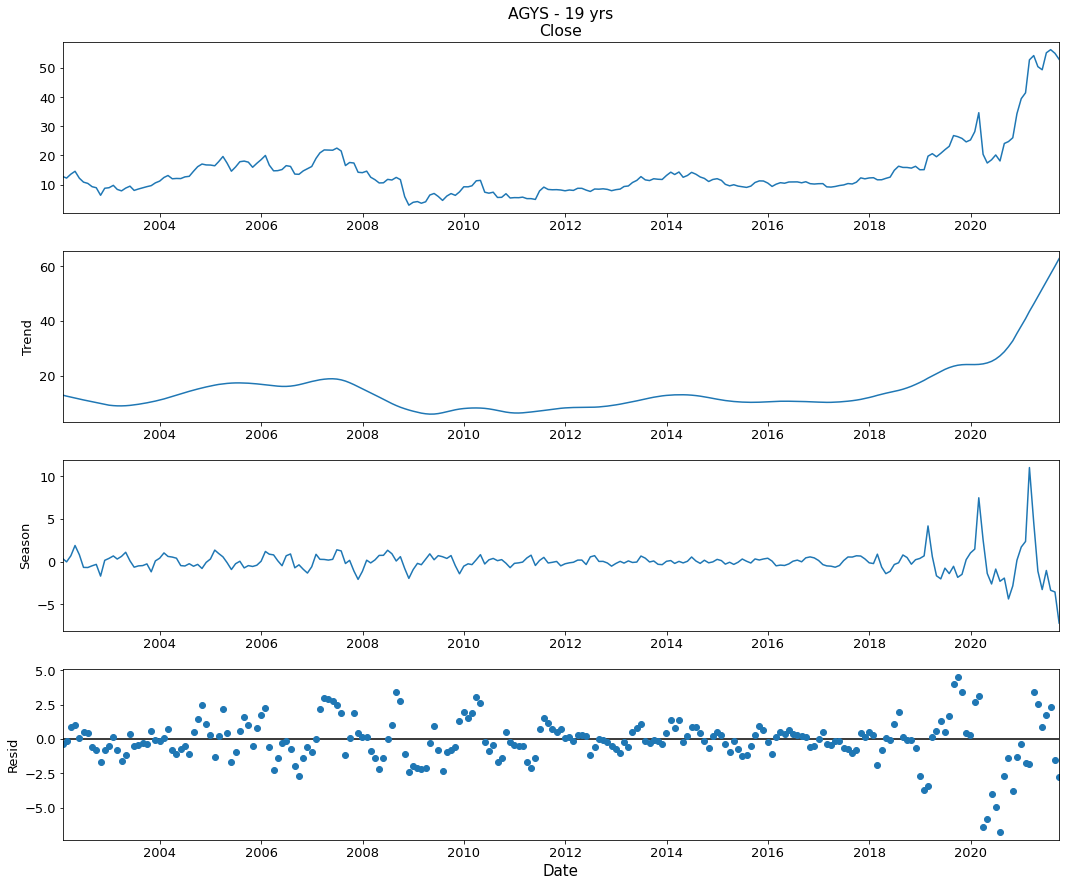

In [21]:
plt.rc('figure', figsize = (15,12))
plt.rc('font', size = 13)

res.plot()
plt.title('AGYS - 19 yrs', pad = 650)
plt.xlabel('Date', fontsize =15)
plt.show()

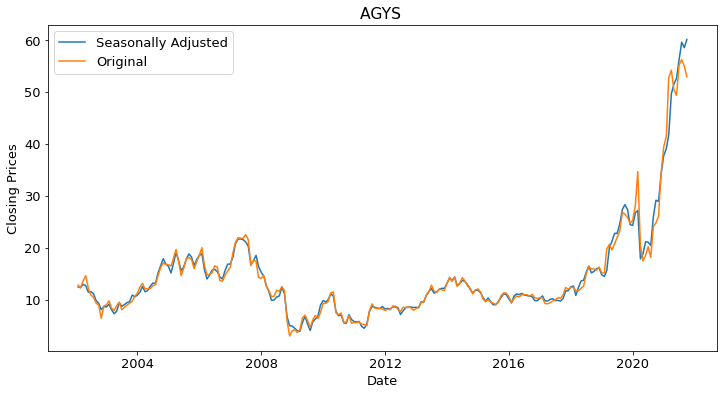

In [22]:
# Seasonally adjusted data
adjusted_seasonal = data - s

plt.figure(figsize=(12,6))
plt.plot(adjusted_seasonal, label='Seasonally Adjusted')
plt.plot(data, label='Original')
plt.title('AGYS ')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend()
plt.show()

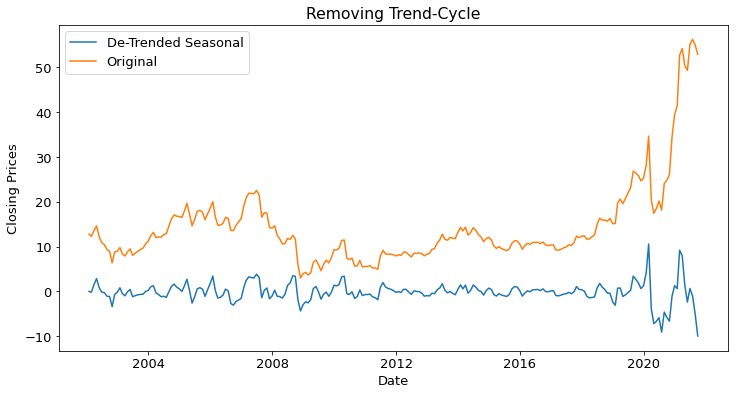

In [23]:
# Detrended data
detrended = data - t

plt.figure(figsize=(12,6))
plt.plot(detrended, label='De-Trended Seasonal')
plt.plot(data, label='Original')
plt.title('Removing Trend-Cycle')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend()
plt.show()

In [24]:
# Strength of trend & seasonality
r = np.array(r)
s = np.array(s)
t = np.array(t)
Ft = np.max([0,1-np.var(r)/np.var(t+r)])
Fs = np.max([0,1-np.var(r)/np.var(s+r)])
print('The strength of the trend for this dataset is = ', Ft)
print('The strength of the seasonality for this dataset is = ', Fs)

The strength of the trend for this dataset is =  0.9717910748104044
The strength of the seasonality for this dataset is =  0.47641287918289876


In [ ]:
# To reduce of the growing trend in the series, we first take a log of the series. 
# We then calculate the rolling average of the series after obtaining the log of the series.
#A rolling average is computed by taking data from the previous 12 months and calculating a mean consumption value at each subsequent point in the series.

# Make Data Stationary

In [25]:
# First order differencing of the closing price
df_log1 = arima['Close'].diff()
df_log1

Date
2002-01-02         NaN
2002-01-03    0.630000
2002-01-04   -0.259999
2002-01-07    0.070000
2002-01-08   -0.020000
                ...   
2021-09-23    1.439999
2021-09-24   -1.200001
2021-09-27    0.720001
2021-09-28   -2.450001
2021-09-29    0.630001
Name: Close, Length: 4971, dtype: float64

In [26]:
df_log = pd.DataFrame(data=df_log1)
df_log

,Close
Date,
2002-01-02,NaN
2002-01-03,0.630000
2002-01-04,-0.259999
2002-01-07,0.070000
2002-01-08,-0.020000
...,...
2021-09-23,1.439999
2021-09-24,-1.200001
2021-09-27,0.720001


In [28]:
# ADF test First order differencing 
result = adfuller(df_log[1:])
print('AGYS First order differencing')
print("ADF Statistic: %f" %result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

AGYS First order differencing
ADF Statistic: -14.214480
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [44]:
df_log.to_csv('log_prices.csv')

# Plotting Rolling Mean and Standard Deviation After Differencing 

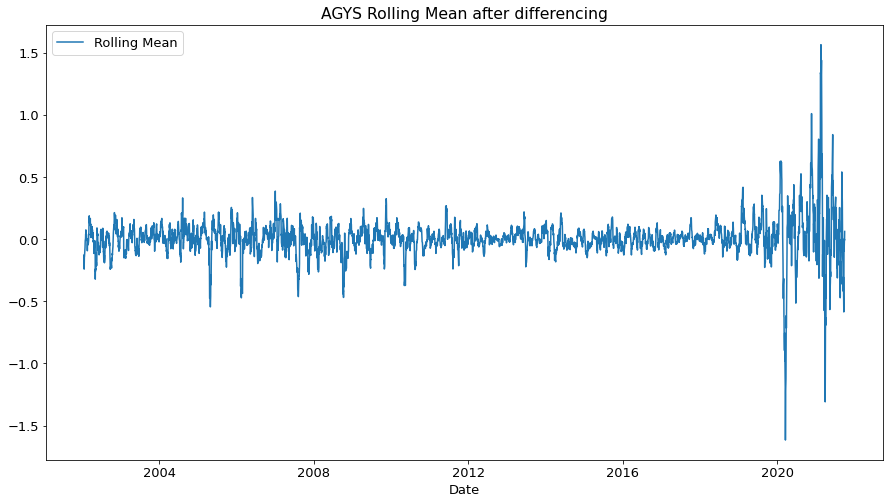

In [29]:
# Plotting mean 

rolling_mean = df_log.rolling(window = 12).mean()

plt.figure(figsize=(15,8))
plt.plot(rolling_mean, label = 'Rolling Mean')
plt.legend()
plt.title('AGYS Rolling Mean after differencing')
plt.xlabel('Date')
plt.show()

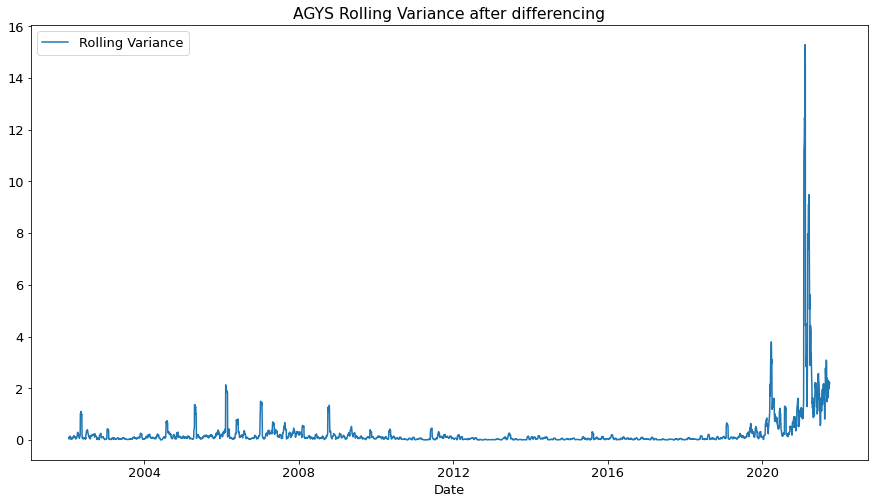

In [30]:
# plotting variance

rolling_var = df_log.rolling(window = 12).var()

plt.figure(figsize=(15,8))
plt.plot(rolling_var, label = 'Rolling Variance')
plt.legend()
plt.title('AGYS Rolling Variance after differencing')
plt.xlabel('Date')
plt.show()

In [45]:
rolling_var.to_csv('rolling_var.csv')

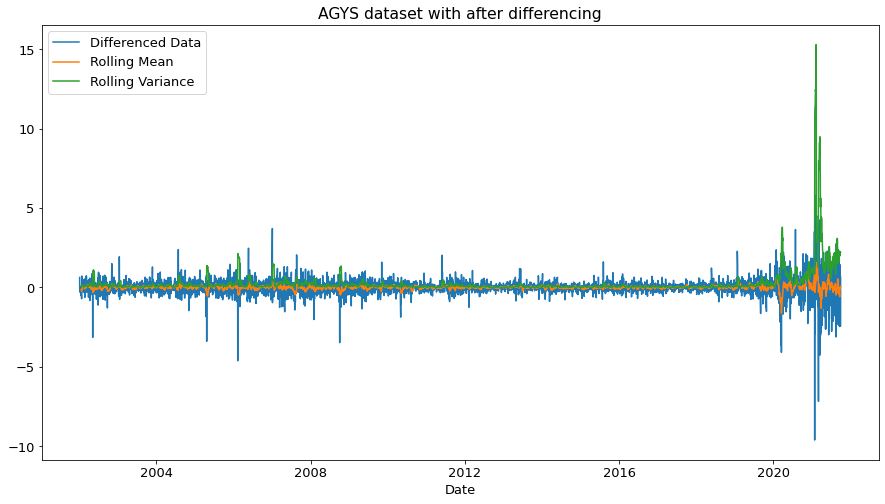

In [31]:
# plotting mean and variance together 

rolling_mean = df_log.rolling(window = 12).mean()
rolling_var = df_log.rolling(window = 12).var()


plt.figure(figsize=(15,8))
plt.plot(df_log.index.values, df_log, label = 'Differenced Data')
plt.plot(rolling_mean, label = 'Rolling Mean')
plt.plot(rolling_var, label = 'Rolling Variance')
plt.legend()
plt.title('AGYS dataset with after differencing')
plt.xlabel('Date')
plt.show()

# Plotting APPLE Stock Price After Differencing

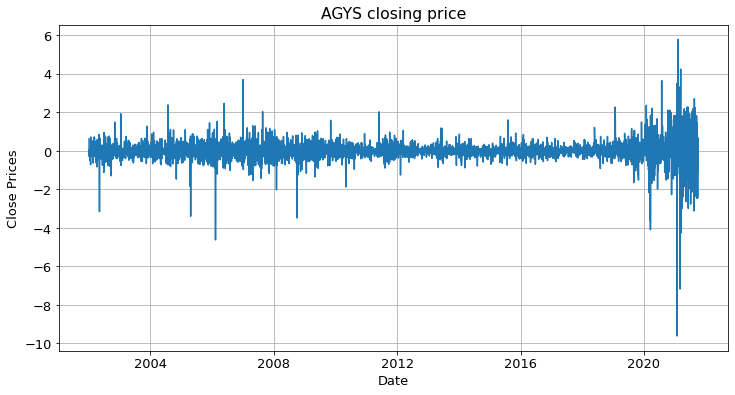

In [32]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df_log)
plt.title('AGYS closing price')
plt.show()

# Autocorrelation & Partial Autocorrelation After Differencing (After Reaching Stationarity) (found HW4 $ HW 9)

In [33]:
def autocorr_cal(y, lags):
    
    ry = [1]
    mean = np.mean(y)

    for i in range(1, lags+1):
        sum_auto = 0
        for j in range(i, len(y)):
            sum_auto += (y[j]-mean)*(y[j-i]-mean)

        auto_cov = sum_auto/len(y)

        
        ry.append(auto_cov/np.var(y))
    return ry

            

In [34]:
df_log

,Close
Date,
2002-01-02,NaN
2002-01-03,0.630000
2002-01-04,-0.259999
2002-01-07,0.070000
2002-01-08,-0.020000
...,...
2021-09-23,1.439999
2021-09-24,-1.200001
2021-09-27,0.720001


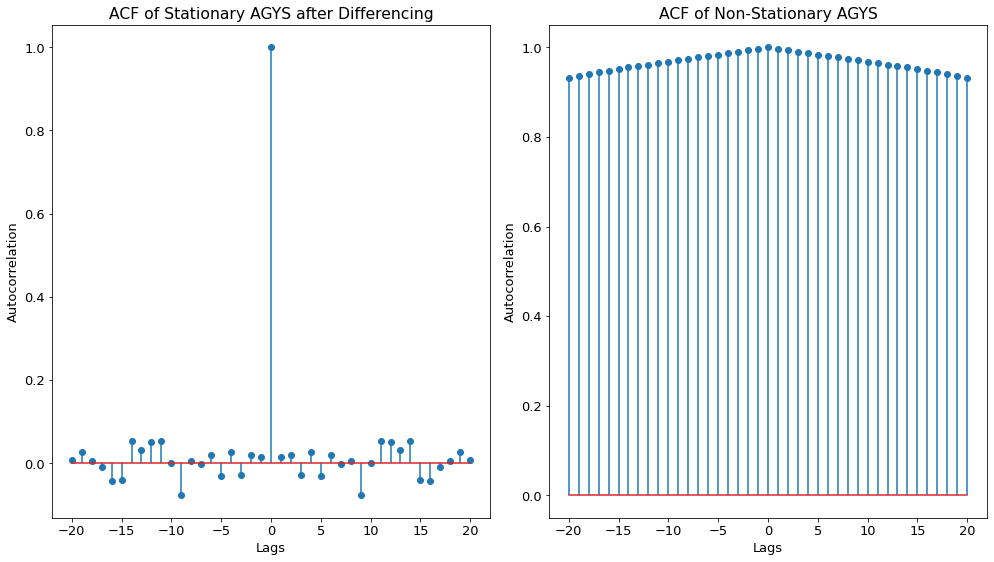

In [35]:
#def auocorr_cal(y, lags):

tau = 20
ry = autocorr_cal(df_log['Close'][1:], tau)
x = np.linspace(-20,20,41)

# Create reverse of ry, ryy
ryy = ry[::-1]
Ry = ryy + ry[1::]

# Plot autocorrelation
fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(1,2,1)
ax1.stem(x, Ry, use_line_collection = True)
ax1.set(xlabel = 'Lags', ylabel = 'Autocorrelation')
ax1.set_title('ACF of Stationary AGYS after Differencing')

# Find autocorrelation of APPLE at 20 lags
tau = 20
ry = autocorr_cal(arima['Close'], tau)

# Create reverse of ry, ryy
ryy = ry[::-1]
Ry = ryy + ry[1::]

# Plot 
ax2 = fig.add_subplot(1,2,2)
ax2.stem(x, Ry, use_line_collection = True)
ax2.set(xlabel = 'Lags', ylabel = 'Autocorrelation')
ax2.set_title('ACF of Non-Stationary AGYS')

fig.tight_layout()
plt.show()
    

In [36]:
Ry

[0.9325062829731953,
 0.9363863719710893,
 0.9402749681580602,
 0.9439541874691568,
 0.9474892680483453,
 0.9511492611469724,
 0.9549033245967404,
 0.9582910771219073,
 0.9615552155649839,
 0.9646409555630254,
 0.9677108913957092,
 0.97071658628806,
 0.9740864437896287,
 0.9772321795549277,
 0.9804111263543095,
 0.9836331381969766,
 0.9870721108846123,
 0.990327533740412,
 0.9937320539349049,
 0.9968640918710846,
 1,
 0.9968640918710846,
 0.9937320539349049,
 0.990327533740412,
 0.9870721108846123,
 0.9836331381969766,
 0.9804111263543095,
 0.9772321795549277,
 0.9740864437896287,
 0.97071658628806,
 0.9677108913957092,
 0.9646409555630254,
 0.9615552155649839,
 0.9582910771219073,
 0.9549033245967404,
 0.9511492611469724,
 0.9474892680483453,
 0.9439541874691568,
 0.9402749681580602,
 0.9363863719710893,
 0.9325062829731953]

In [37]:
def GPAC_cal(Ry, k, j): # RY is the estimated autocorrelation
    
    for c in range(1, k):
        
        if c == 1:
            phi_col = []
            for i in range(j):
                start = len(Ry)//2 + i + 1
                num = Ry[start]
                den = Ry[start-1]
                phi_col.append((num/den).tolist())
                matrix1 = np.array(phi_col)

        elif c == 2:
            phi_col = []
            for i in range(j):  
                start = len(Ry)//2 + i
                l_col = Ry[start:start+c] 
                r_num = Ry[start+1:start+c+1]  
                num = np.column_stack((l_col,r_num))
                r_den = Ry[start-1:start+c-1]
                den = np.column_stack((l_col,r_den))
                phi_col.append(np.linalg.det(num)/np.linalg.det(den))
            matrix2 = np.array(phi_col).reshape(j,1)
            matrix = np.column_stack((matrix1,matrix2))
        else:
            phi_col = []
            for i in range(j):
                col = []
                for a in range(c-1): 
                    start = len(Ry)//2 + i
                    col.append(Ry[start-a:start+c-a].tolist())
                col = np.array(col).T
                r_num = Ry[start+1:start+c+1]
                r_den = Ry[start-c+1:start+1]
                num = np.column_stack((col,r_num))
                den = np.column_stack((col,r_den))
                phi_col.append(np.linalg.det(num)/np.linalg.det(den))
            matrix3 = np.array(phi_col)
            matrix = np.column_stack((matrix,matrix3))
    plt.figure(figsize=(12,8))
    sns.heatmap(matrix, annot=True, annot_kws={'size':15}, fmt='.3f', xticklabels=np.arange(1, k, step=1))
    sns.color_palette('rocket')
    plt.show()

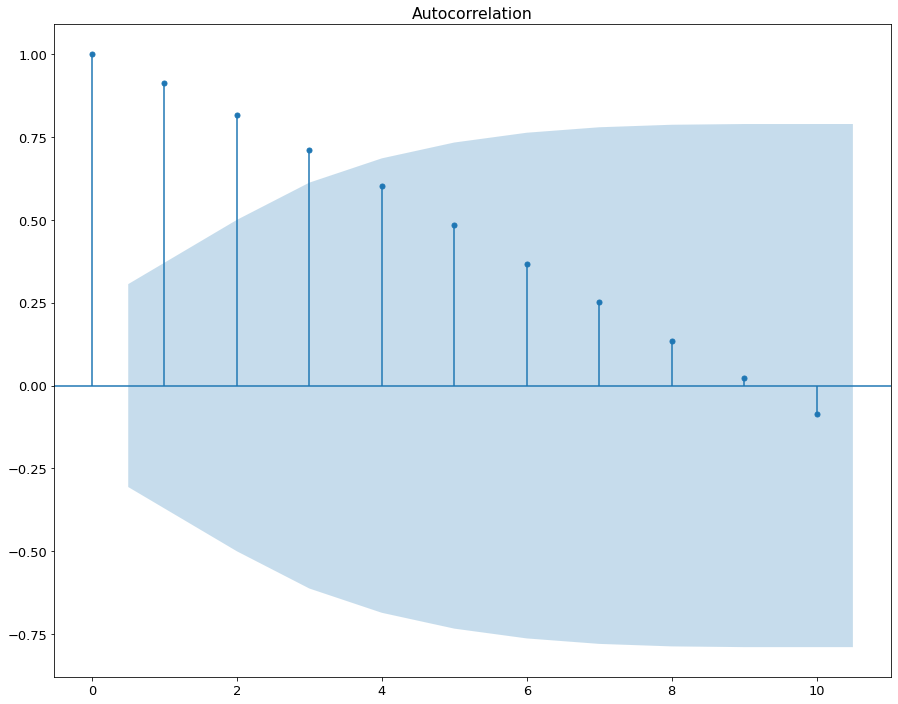

In [38]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_acf(Ry, lags=10)
plt.show()


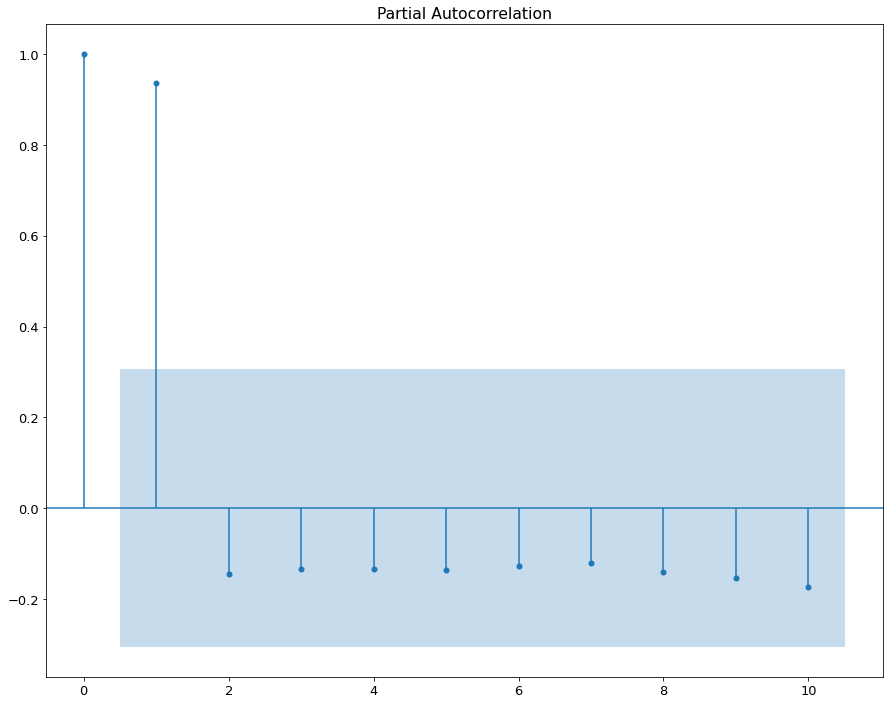

In [40]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_pacf(Ry, lags=10)
plt.show()

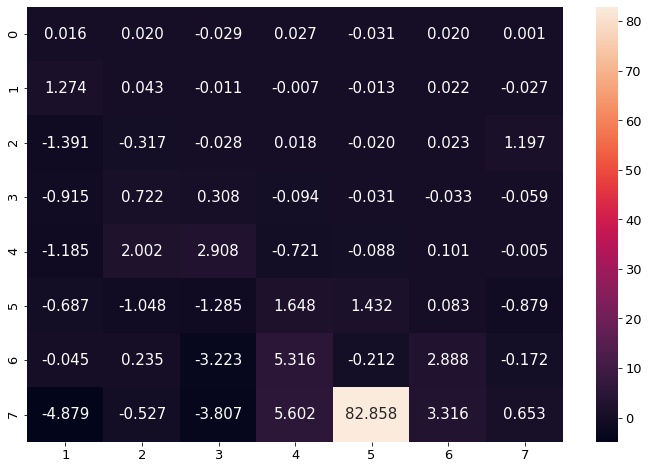

In [41]:
# Plot ACF & PACF
lags = 100

# GPAC
ry = sm.tsa.stattools.acf(df_log[1:], nlags=lags)
ry1 = ry[::-1]
Ry = np.concatenate((ry1[0:-1], ry))
GPAC_cal(Ry,8,8)

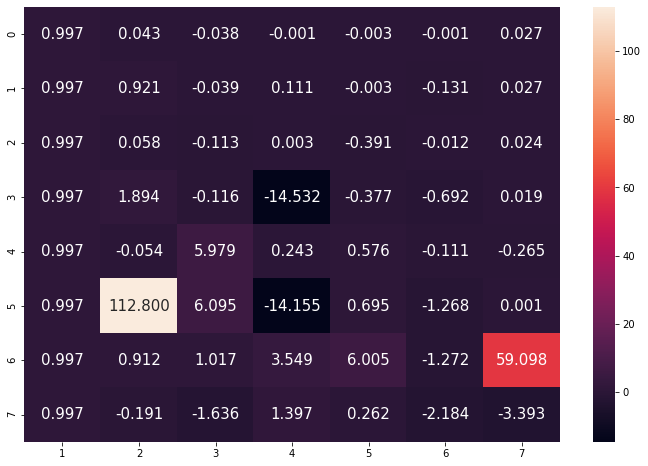

In [46]:
# #Plot ACF & PACF
#lags = 100

#GPAC
#ry = sm.tsa.stattools.acf(arima, nlags=lags)
#ry1 = ry[::-1]
#Ry = np.concatenate((ry1[0:-1], ry))
#GPAC_cal(Ry,8,8)

# Splitting data into training and testing

In [42]:
arima['Close']

Date
2002-01-02    13.480000
2002-01-03    14.110000
2002-01-04    13.850000
2002-01-07    13.920000
2002-01-08    13.900000
                ...    
2021-09-23    53.840000
2021-09-24    52.639999
2021-09-27    53.360001
2021-09-28    50.910000
2021-09-29    51.540001
Name: Close, Length: 4971, dtype: float64

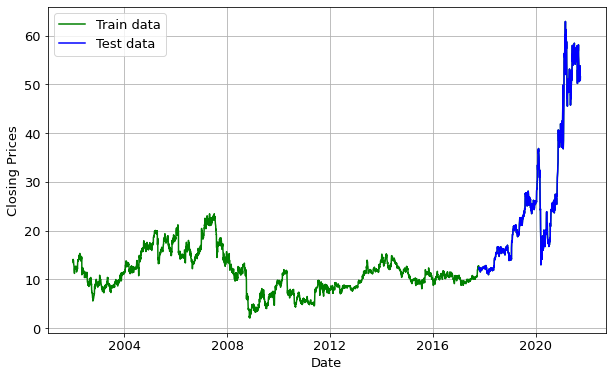

In [44]:
#split data into train and training set
train_data, test_data = arima['Close'][0:int(len(arima['Close'])*0.80)], arima['Close'][int(len(arima['Close'])*0.80):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.plot(arima['Close'], 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [45]:
print(len(train_data))
print(len(test_data))

3976
995


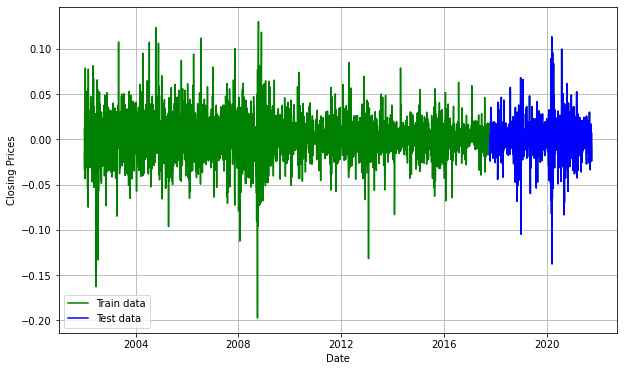

In [38]:
#split data into train and training set
train_data, test_data = df_log1[0:int(len(df_log1)*0.8)], df_log1[int(len(df_log1)*0.8):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.plot(df_log1, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

# Naive Model

In [5]:
# the last period value is the forecat for this period

naive = arima
naive

,Close
Date,
2002-01-02,13.480000
2002-01-03,14.110000
2002-01-04,13.850000
2002-01-07,13.920000
2002-01-08,13.900000
...,...
2021-09-23,53.840000
2021-09-24,52.639999
2021-09-27,53.360001


In [6]:
naive ['lag'] = arima['Close'].shift(1)
naive

,Close,lag
Date,,
2002-01-02,13.480000,NaN
2002-01-03,14.110000,13.480000
2002-01-04,13.850000,14.110000
2002-01-07,13.920000,13.850000
2002-01-08,13.900000,13.920000
...,...,...
2021-09-23,53.840000,52.400002
2021-09-24,52.639999,53.840000
2021-09-27,53.360001,52.639999


In [7]:
# splitting data into 80 training 20 test

train, test = naive[1:naive.shape[0]-995], naive[naive.shape[0]-995:]

In [8]:
train_x, train_y = train['lag'], train['Close']
test_x, test_y = test['lag'], test['Close']

In [9]:
forecast = test_x.copy()


In [10]:
print(forecast)
print(test_y)

# the first are the forecasted values and the second are the actual values
# as we see the value of 2020-12-30 is the predicted values for price 2020-12-31

Date
2017-10-17    12.750000
2017-10-18    12.480000
2017-10-19    12.450000
2017-10-20    12.250000
2017-10-23    12.220000
                ...    
2021-09-23    52.400002
2021-09-24    53.840000
2021-09-27    52.639999
2021-09-28    53.360001
2021-09-29    50.910000
Name: lag, Length: 995, dtype: float64
Date
2017-10-17    12.480000
2017-10-18    12.450000
2017-10-19    12.250000
2017-10-20    12.220000
2017-10-23    12.170000
                ...    
2021-09-23    53.840000
2021-09-24    52.639999
2021-09-27    53.360001
2021-09-28    50.910000
2021-09-29    51.540001
Name: Close, Length: 995, dtype: float64


In [11]:
mse = mean_squared_error(test_y, forecast)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_y, forecast)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_y, forecast))
print('RMSE: '+str(rmse))

MSE: 0.8736075314937318
MAE: 0.54734675153416
RMSE: 0.9346697446123587


In [12]:
def train_MSE(error_sq):
    
    return sum(error_sq.fillna(0))/(len(error_sq) - 1)

In [13]:
def test_MSE(error_sq):

    return sum(error_sq)/(len(error_sq))  

# Alternatively for MSE: mse = np.square(np.subtract(y_test,prediction)).mean()

In [14]:
def variance(error_sq):

    return sum(error_sq.fillna(0))/(len(arima['Close']) - 1)

In [15]:
# Copy training dataframe
naive = arima.copy(deep = True)

# Generate close(t-1)
for i in range(0, naive.shape[0]-1):
     naive.loc[naive.index[i+1], 'naive'] = naive['Close'][i]

# Generate error term
for i in range(1, naive.shape[0]):
    naive.loc[naive.index[i], 'naive_e'] = naive['Close'][i] - naive['naive'][i]

# Generate squared error
for i in range(1, naive.shape[0]):
    naive.loc[naive.index[i], 'naive_e^2'] = naive['naive_e'][i]**2

# split data to train and test
train = naive[:3976]
test = naive[3976:]

# Get MSE for naive train and test sets
naive_train_MSE = train_MSE(train['naive_e^2'])
naive_test_MSE = test_MSE(test['naive_e^2'])
naive

,Close,lag,naive,naive_e,naive_e^2
Date,,,,,
2002-01-02,13.480000,NaN,NaN,NaN,NaN
2002-01-03,14.110000,13.480000,13.480000,0.630000,0.396900
2002-01-04,13.850000,14.110000,14.110000,-0.259999,0.067600
2002-01-07,13.920000,13.850000,13.850000,0.070000,0.004900
2002-01-08,13.900000,13.920000,13.920000,-0.020000,0.000400
...,...,...,...,...,...
2021-09-23,53.840000,52.400002,52.400002,1.439999,2.073596
2021-09-24,52.639999,53.840000,53.840000,-1.200001,1.440002
2021-09-27,53.360001,52.639999,52.639999,0.720001,0.518402


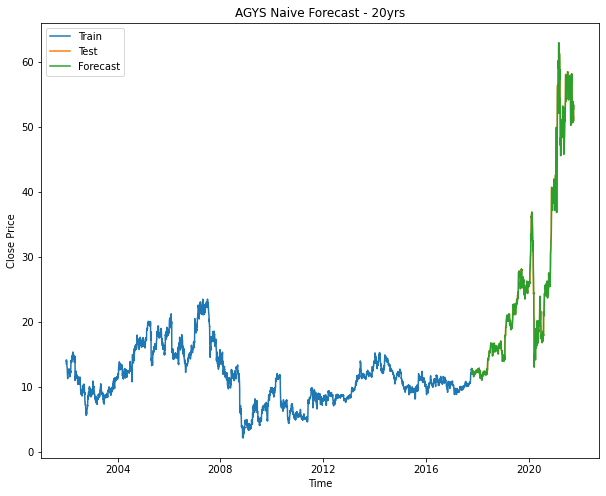

In [16]:
plt.figure(figsize = (10,8))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(test.index, test['naive'], label='Forecast')
plt.title('AGYS Naive Forecast - 20yrs')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend(loc='best')
plt.show()

In [67]:
# Print MSE results
print('MSE of prediction errors: ', naive_train_MSE)
print('MSE of forecast errors: ', naive_test_MSE)

MSE of prediction errors:  0.12560742744080713
MSE of forecast errors:  0.8736075314937318


# ARIMA Model

In [ ]:
# Auto ARIMA: Automatically discover the optimal order for an ARIMA model. 

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3038.050, Time=0.54 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3008.742, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3008.128, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3036.051, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3010.070, Time=1.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3010.054, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3012.058, Time=0.90 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3006.130, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3008.072, Time=0.42 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3008.055, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3006.744, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3010.060, Time=0.28 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 5.612 seconds
                               SARIMAX Results                                
Dep. Vari

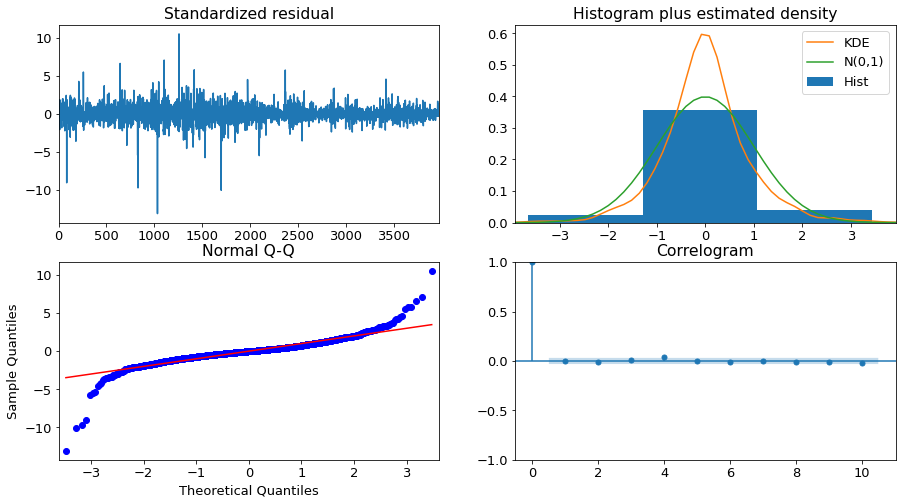

In [68]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
#Top left: The residual errors appear to have a uniform variance and fluctuate around a mean of zero.

#Top Right: The density plot on the top right suggests a normal distribution with a mean of zero.

#Bottom left: The red line should be perfectly aligned with all of the dots. Any significant deviations would indicate a skewed distribution.

#Bottom Right: The residual errors are not autocorrelated, as shown by the Correlogram, also known as the ACF plot. Any autocorrelation would imply that the residual errors have a pattern that isn’t explained by the model. As a result, you’ll need to add more Xs (predictors) to the model.

# Modeling:


In [69]:
# Build Model
# if differencing is involved then train data must be raw data that is non stationary
# develop forecasting function after building the model

#  fit a model using training data, and then to evaluate its performance on a test data set.
model = ARIMA(train_data, order=(0,1,1))  
fitted = model.fit() 
print(fitted.summary())



#from statsmodels.tsa.arima_model import ARMA
#from statsmodels.tsa.arima.model import ARIMA

#model = ARMA(train_data, order=(1, 1))# fit model
#fitted = model.fit(disp=-1)  
#print(fitted.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 3975
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1501.064
Method:                       css-mle   S.D. of innovations              0.353
Date:                Sat, 20 Nov 2021   AIC                           3008.128
Time:                        21:48:11   BIC                           3026.991
Sample:                             1   HQIC                          3014.817
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0002      0.005     -0.039      0.969      -0.010       0.010
ma.L1.D.Close    -0.0902      0.016     -5.693      0.000      -0.121      -0.059
                                    Root

# Forecasting

In [79]:
# ARIMA Walk Forward

data = train_data
predict = []
for t in test_data:
    model = ARIMA(data, order=(0,1,1))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data,t)
    data = pd.Series(data)

12.754213165908254
12.504467214052143
12.454637377791412
12.268121402542214
12.22400576955832
12.174523331037584
12.188267275752741
12.098492100116298
11.953875644308722
11.968155025906368
11.905729090106256
12.236850365691804
12.403241012064912
12.318088097661443
11.99182883198448
12.017085796625041
11.764489750002015
11.550569358473759
11.731610669934494
11.829827711642206
12.20282741083688
11.917765739737636
11.855681372927211
12.059423379395598
11.877566242559977
11.897567479402788
12.072281429978881
12.088041124056765
12.116764034983035
11.946446496091658
12.185871346985998
12.243891052869547
12.240027889603768
12.230579249704924
12.047730151162394
12.058525049687223
12.150496587452038
12.450013904652922
12.422429707152592
12.301638603682276
12.21793584207703
12.29228903844822
12.344499266422572
12.312807905023758
12.482852815762978
12.461794649703041
12.423494142478438
12.474638275503905
12.38825405819462
12.316757176231107
12.292104974962424
12.399081775989606
12.290436959021575

In [80]:
predict

[12.754213165908254,
 12.504467214052143,
 12.454637377791412,
 12.268121402542214,
 12.22400576955832,
 12.174523331037584,
 12.188267275752741,
 12.098492100116298,
 11.953875644308722,
 11.968155025906368,
 11.905729090106256,
 12.236850365691804,
 12.403241012064912,
 12.318088097661443,
 11.99182883198448,
 12.017085796625041,
 11.764489750002015,
 11.550569358473759,
 11.731610669934494,
 11.829827711642206,
 12.20282741083688,
 11.917765739737636,
 11.855681372927211,
 12.059423379395598,
 11.877566242559977,
 11.897567479402788,
 12.072281429978881,
 12.088041124056765,
 12.116764034983035,
 11.946446496091658,
 12.185871346985998,
 12.243891052869547,
 12.240027889603768,
 12.230579249704924,
 12.047730151162394,
 12.058525049687223,
 12.150496587452038,
 12.450013904652922,
 12.422429707152592,
 12.301638603682276,
 12.21793584207703,
 12.29228903844822,
 12.344499266422572,
 12.312807905023758,
 12.482852815762978,
 12.461794649703041,
 12.423494142478438,
 12.47463827550390

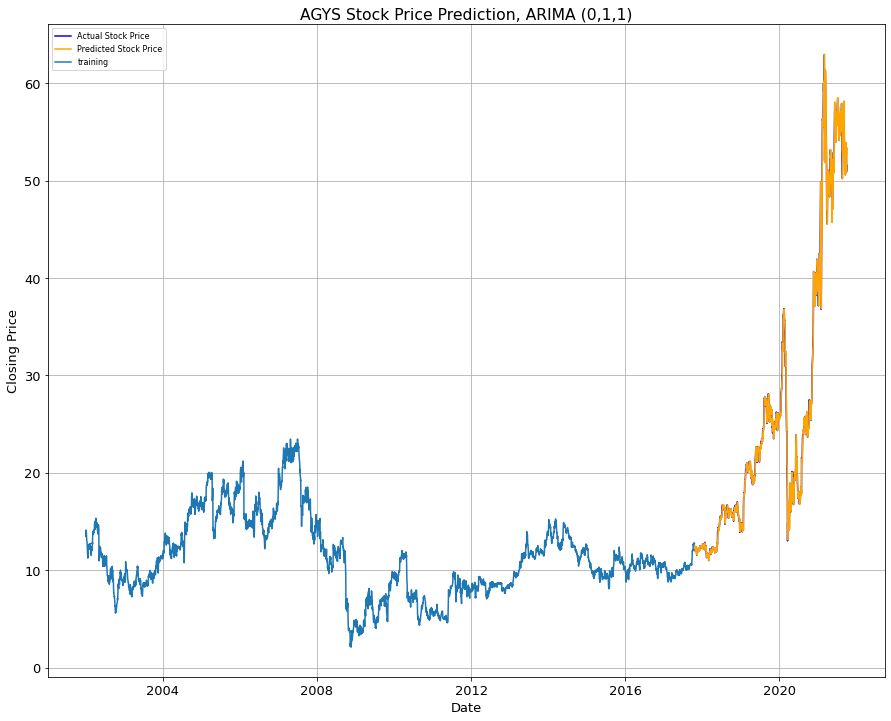

In [81]:
predict = pd.Series(predict, index=test_data.index)
#lower_series = pd.Series(conf[:, 0], index=test_data.index)
#upper_series = pd.Series(conf[:, 1], index=test_data.index)

plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(predict, color = 'orange',label='Predicted Stock Price')
plt.plot(train_data, label='training')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=0.10)
plt.title('AGYS Stock Price Prediction, ARIMA (0,1,1)')
plt.xlabel('Date')
plt.grid(True)
plt.ylabel('Closing Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Accuracy Measures:

In [82]:
# Model Performance
mse = mean_squared_error(test_data, predict)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, predict)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, predict))
print('RMSE: '+str(rmse))

MSE: 0.879240927361836
MAE: 0.549416585549588
RMSE: 0.9376784776040431


In [83]:
Accuracy = pd.DataFrame({'MSE':mse, 'MAE': mae, 'RMSE':rmse}, index=[1])
Accuracy

,MSE,MAE,RMSE
1,0.879241,0.549417,0.937678


In [ ]:
# p Autoregressive -  Yt = a+ b1Yt-1 + b2Yt-2 + error 1

# when p = 2

#stock price today(yt)(Nov 8) = a + b1(price yesterday)(Nov 7) + b2(price day before )(Nov 6) + error   


# q Moving Average - Yt = a + Et + b1Et-1 + b2Et-2

#the present value of time series model are dependent on its past values and on the error of past values. the error is the difference between actual 
#values and predicted values. 

# q determines the number of past lag values error used to predict yt (determined by ACF Plot)

# Hyperparameter Tunning (p,d,q)

In [79]:
train,test = arima[:801], arima[801:]

In [177]:
train

Date
2018-01-02     43.064999
2018-01-03     43.057499
2018-01-04     43.257500
2018-01-05     43.750000
2018-01-08     43.587502
                 ...    
2021-03-03    122.059998
2021-03-04    120.129997
2021-03-05    121.419998
2021-03-08    116.360001
2021-03-09    121.089996
Name: Close, Length: 801, dtype: float64

In [80]:
test

,AAPL
Date,
2021-03-10,121.03
2021-03-11,123.99
2021-03-12,125.57
2021-03-15,124.76
2021-03-16,120.53
...,...
2021-09-23,146.83
2021-09-24,146.92
2021-09-27,145.37


In [81]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


In [83]:
p_values = range(0, 8)
d_values = range(0, 1) #this is the range for the values
q_values = range(0, 0) #this is the range for the values

In [84]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train,test = arima[:754], arima[754:]
            predictions = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train,order)
                    model_fit = model.fit(disp=0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error = mean_squared_error(test, predictions)
                    print('Best ARIMA%s , MSE = %.2f' % (order, error))
                except:
                    continue
          

Best ARIMA(0, 0, 0) , MSE = 4949.47
Best ARIMA(0, 0, 1) , MSE = 1527.38
Best ARIMA(0, 0, 2) , MSE = 1258.64
Best ARIMA(1, 0, 0) , MSE = 133.24
Best ARIMA(2, 0, 0) , MSE = 128.05
